In [1]:
import pymc as pm

In [2]:
import arviz as az

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('maternal-mortality-2021-all.csv')


print(df.head())


                      Region  Country  Year  DeathCount  DeathRate
0                       Asia  Armenia  2021          16   1.017724
1                     Europe  Austria  2021           3   0.066034
2                     Europe  Czechia  2021           4   0.075091
3  Central and South America  Ecuador  2021         190   2.124496
4                     Europe    Spain  2021          11   0.045567


In [4]:
df['Region_Code'] = pd.Categorical(df['Region']).codes
df['Country_Code'] = pd.Categorical(df['Country']).codes

print(df.isnull().sum())


df.dropna(inplace=True)


df['DeathRate'] = np.log(df['DeathRate'] + 1) 

Region          0
Country         0
Year            0
DeathCount      0
DeathRate       0
Region_Code     0
Country_Code    0
dtype: int64


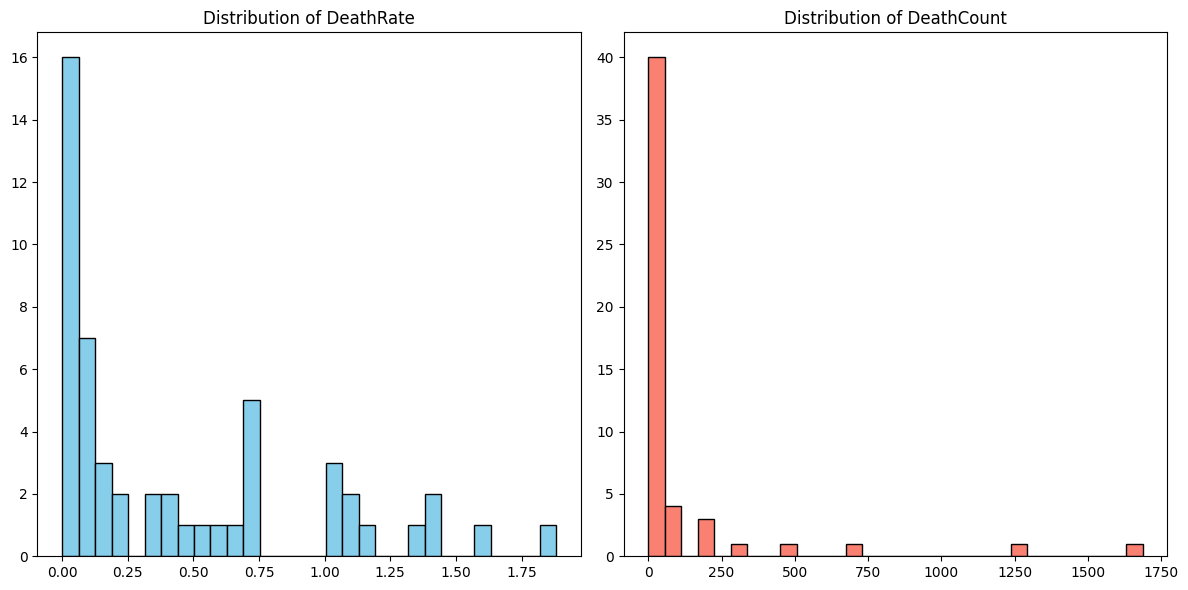

<Figure size 1000x600 with 0 Axes>

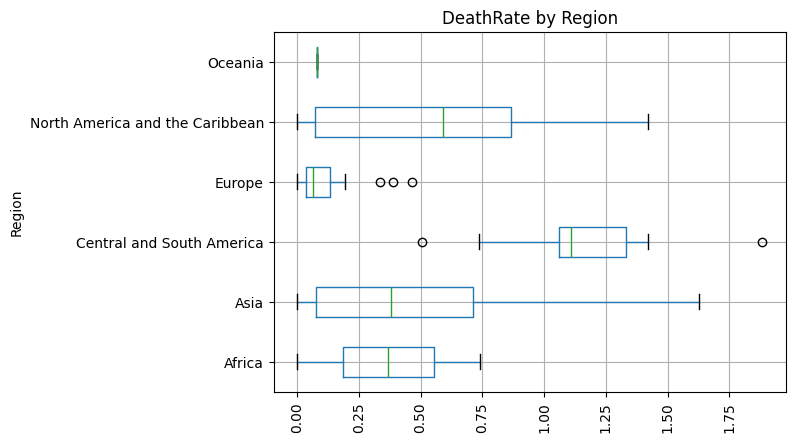

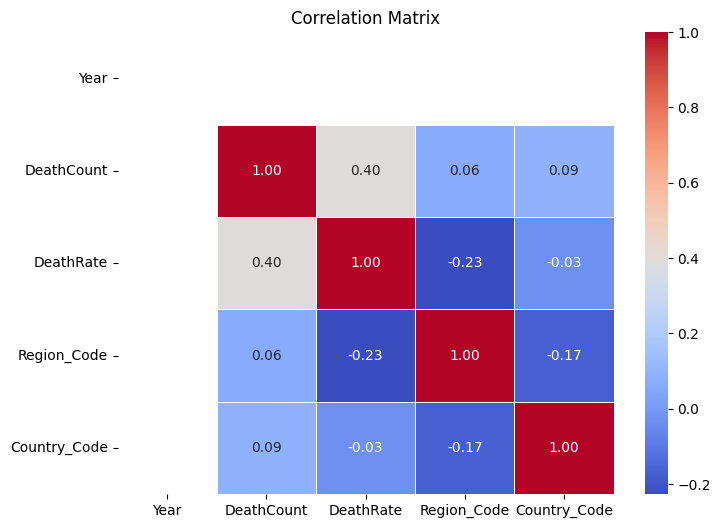

In [5]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['DeathRate'], bins=30, edgecolor='k', color='skyblue')
plt.title('Distribution of DeathRate')

plt.subplot(1, 2, 2)
plt.hist(df['DeathCount'], bins=30, edgecolor='k', color='salmon')
plt.title('Distribution of DeathCount')

plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
df.boxplot(column='DeathRate', by='Region', vert=False)
plt.title('DeathRate by Region')
plt.suptitle('')  
plt.xticks(rotation=90)
plt.show()


numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

